
# How to use the functions in validation/plot_color.py

First make sure the validation directory is in your PYTHONPATH, then you will be able to import the code.


In [1]:
import pandas as pd
import plot_color as pc
import matplotlib.pyplot as plt

%matplotlib inline

# Read in the files to compare

In this case we are comparing a Galacticus simulation with and without host galaxy dust.

The files are read into a `pandas` dataframe. Use these resources if you want to learn more about `pandas`:
* [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Video tutorial](https://www.youtube.com/watch?v=w26x-z-BdWQ) by Wes McKinney
* [Walkthrough exercises](https://github.com/estimate/pandas-exercises) from the pandas tutorial by Wes McKinney

In [2]:
galacticus_no_dust = pd.read_csv('nodust.txt', sep='\s+')
print galacticus_no_dust.columns
galacticus_no_dust.head()

Index([u'redshift', u'LSSTu', u'LSSTg', u'LSSTr', u'LSSTi', u'LSSTz',
       u'LSSTy'],
      dtype='object')


,redshift,LSSTu,LSSTg,LSSTr,LSSTi,LSSTz,LSSTy
0,2.00673,25.7528,25.4016,25.2731,25.2998,25.1129,24.9197
1,2.00085,28.3486,27.9955,27.9371,27.9550,27.8462,27.7711
2,2.00674,26.4708,26.1743,25.9234,25.8943,25.6182,25.3514
3,2.00674,25.3384,24.8637,24.6844,24.7034,24.5244,24.3607
4,2.00668,23.1155,22.8776,22.8405,22.9348,22.9104,22.8829


In [3]:
galacticus_dust = pd.read_csv('dust.txt', sep='\s+')
print galacticus_dust.columns
galacticus_dust.head()

Index([u'redshift', u'LSSTu', u'LSSTg', u'LSSTr', u'LSSTi', u'LSSTz',
       u'LSSTy'],
      dtype='object')


,redshift,LSSTu,LSSTg,LSSTr,LSSTi,LSSTz,LSSTy
0,2.00673,26.0028,25.5853,25.5494,25.5100,25.2827,25.0658
1,2.00085,28.5426,28.1210,28.1623,28.1160,27.9659,27.8720
2,2.00674,28.7974,28.2089,27.9281,27.7141,27.2492,26.8432
3,2.00674,25.4283,24.9257,24.7801,24.7766,24.5820,24.4147
4,2.00668,24.1561,23.8448,23.8962,23.9201,23.8549,23.7983


# Calculate colors

The `color_boxplot` function needs to operate on colors stored in a pandas dataframe. The below code adds color columns to the existing pandas dataframe.

In [4]:
color_columns = ['LSSTu', 'LSSTg', 'LSSTr', 'LSSTi', 'LSSTz', 'LSSTy']
ncolor = len(color_columns)-1
for i in range(ncolor):
    color_name = color_columns[i] + "-" + color_columns[i+1]
    
    # add color column to no dust simulation
    galacticus_no_dust[color_name] = galacticus_no_dust[color_columns[i]] - \
                                     galacticus_no_dust[color_columns[i+1]]
        
    # add color column to dust simulation
    galacticus_dust[color_name] = galacticus_dust[color_columns[i]] - \
                                     galacticus_dust[color_columns[i+1]]
   
print "No dust simulation:"
print galacticus_no_dust.head() ,"\n\n"

print "Dust simulation:"
print galacticus_dust.head()

No dust simulation:
   redshift    LSSTu    LSSTg    LSSTr    LSSTi    LSSTz    LSSTy  \
0   2.00673  25.7528  25.4016  25.2731  25.2998  25.1129  24.9197   
1   2.00085  28.3486  27.9955  27.9371  27.9550  27.8462  27.7711   
2   2.00674  26.4708  26.1743  25.9234  25.8943  25.6182  25.3514   
3   2.00674  25.3384  24.8637  24.6844  24.7034  24.5244  24.3607   
4   2.00668  23.1155  22.8776  22.8405  22.9348  22.9104  22.8829   

   LSSTu-LSSTg  LSSTg-LSSTr  LSSTr-LSSTi  LSSTi-LSSTz  LSSTz-LSSTy  
0       0.3512       0.1285      -0.0267       0.1869       0.1932  
1       0.3531       0.0584      -0.0179       0.1088       0.0751  
2       0.2965       0.2509       0.0291       0.2761       0.2668  
3       0.4747       0.1793      -0.0190       0.1790       0.1637  
4       0.2379       0.0371      -0.0943       0.0244       0.0275   


Dust simulation:
   redshift    LSSTu    LSSTg    LSSTr    LSSTi    LSSTz    LSSTy  \
0   2.00673  26.0028  25.5853  25.5494  25.5100  25.2827  25.0

# Boxplots of color distribution

Once you have pandas dataframes containing redshift and color columns you can begin to make the boxplots.

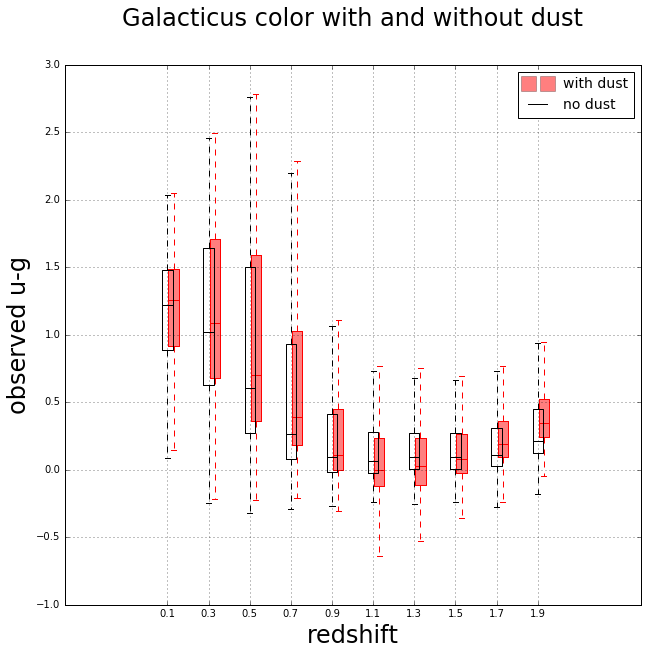

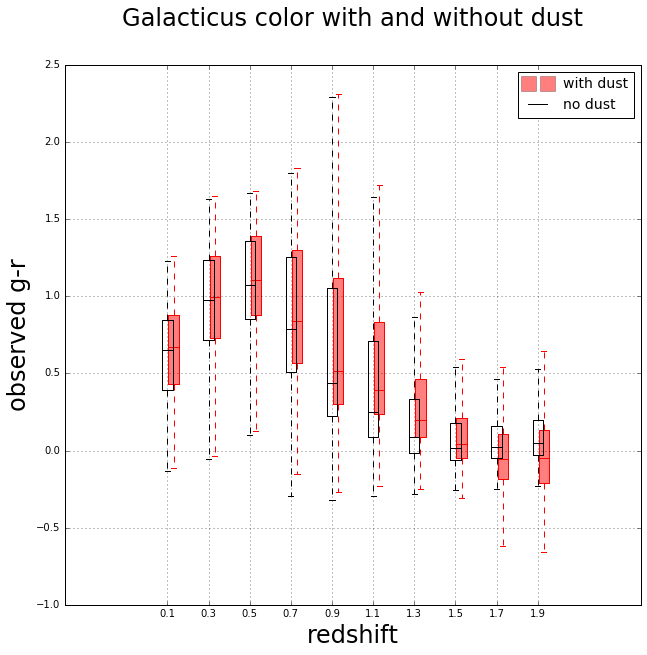

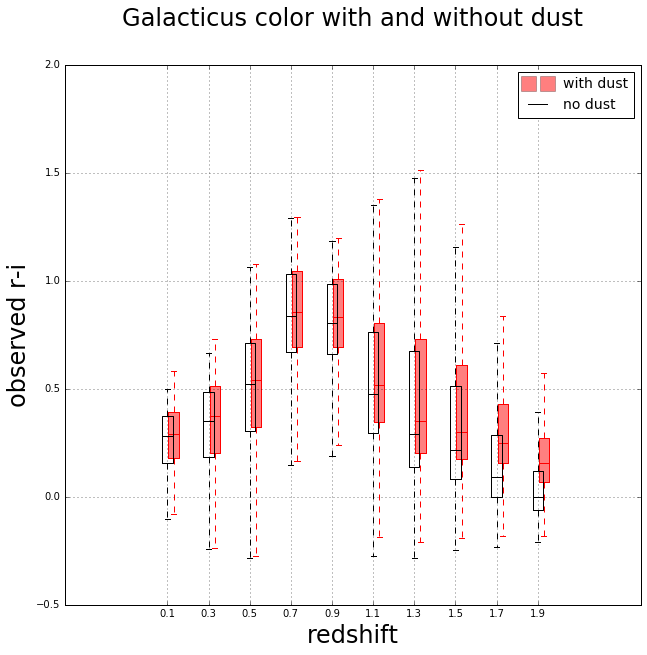

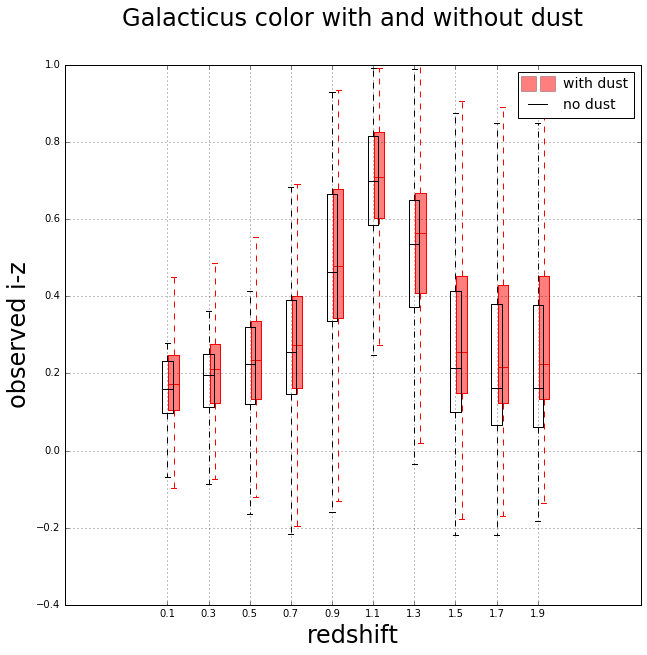

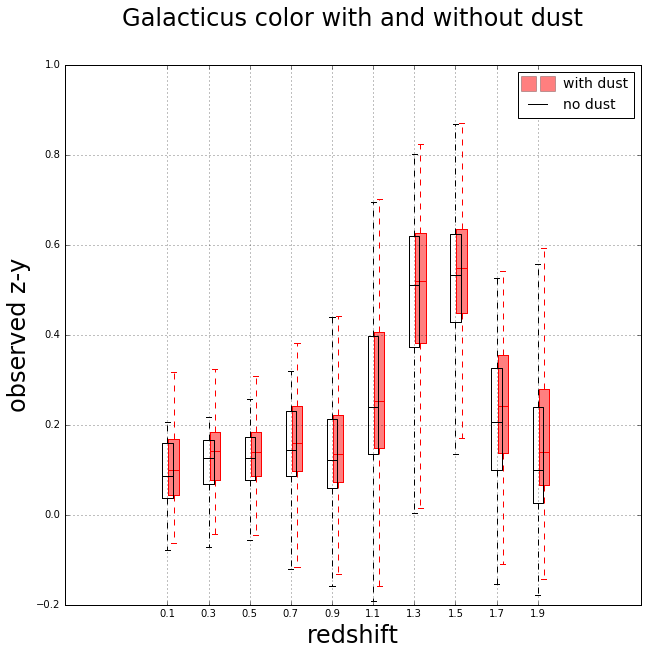

In [5]:

# name of redshift column in each dataframe
# here they happen to have the same name
z_columns = ["redshift", "redshift"]
    
# for each color list of: [name_in_first_df, name_in_second_df]
# in this case the colors have the same name in both dataframes
color_pairs = [['LSSTu-LSSTg', 'LSSTu-LSSTg'], ['LSSTg-LSSTr', 'LSSTg-LSSTr'], 
               ['LSSTr-LSSTi', 'LSSTr-LSSTi'], ['LSSTi-LSSTz', 'LSSTi-LSSTz'],
               ['LSSTz-LSSTy', 'LSSTz-LSSTy'] ]
    
# names of the colors to go on the plot axes
color_names = ['u-g', 'g-r', 'r-i', 'i-z', 'z-y']

# redshift binning to make the plots
zmin = 0.
zmax = 2.
dbin = 0.2
    
for color_name, color_columns in zip(color_names, color_pairs):
    
    # initalise axes to add boxplots to
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
        
    legend_handles = pc.color_boxplot(
                     ax,                 # axes to plot on  
                     galacticus_dust,    # dataframe 1
                     galacticus_no_dust, # dataframe 2
                     color_columns,      # list of names of each color in [[df1, df2]]
                     z_columns,          # name of redshift column in [df1, df2] 
                     zmin, zmax, dbin,   # zmin, zmax, dbin to define the redshift binning
                     zbin_offset=0.03,   # how much to offset 2nd set of color plots by
                     color1='red',       # dataframe 1 will be this color, and shaded 
                     color2='black',     # dataframe 2 will be outlined in this color 
                     boxwidth=0.05,      # how wide in redshift boxplots appear
                     showfliers=False    # show the flier points or not
                     )
    
    ax.set_xlabel('redshift', fontsize=24)
    ax.set_ylabel('observed ' + color_name, fontsize=24)
    fig.suptitle('Galacticus color with and without dust', fontsize=24)
    ax.set_title('')
    
    # the legend will come out with text 'data1' and 'data2'
    # fix it to whatever you like with the below
    
    # fix legend    
    labels = ['with dust', 'no dust']
    ax.legend(legend_handles, labels, prop={'size':14}, loc='upper right')
    
